In [17]:
# load packages 
import pandas as pd
import numpy as np
# visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
# scikitlearn packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# PERFORMANCE PARAMETERS
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [18]:
# load data
train = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [19]:
# missing values
train.isnull().sum().sum()

0

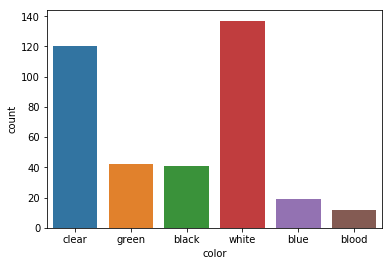

In [20]:
# visualization
sns.countplot(x='color', data=train) 

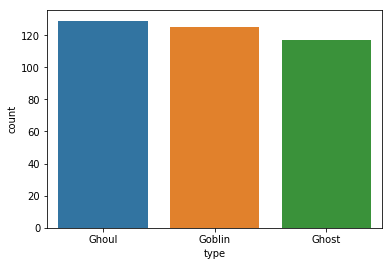

In [21]:
 sns.countplot(x='type', data=train)  # data is fairly balanced

In [22]:
# shuffle the datasets to randomized the 
train = train.sample(frac=1)
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
193,476,0.248854,0.554872,0.506320,0.089402,green,Ghost
99,222,0.313506,0.616803,0.396482,0.447946,blue,Ghost
47,94,0.268141,0.665224,0.234944,0.321623,clear,Ghost
369,896,0.294943,0.771286,0.583503,0.300618,clear,Ghost
184,454,0.571502,0.315792,0.765131,0.575139,clear,Goblin


In [23]:
# feature selection
y = train.type
# drop irrelevant columns
train = train.drop(['type','id'], axis=1)
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
193,0.248854,0.554872,0.506320,0.089402,green
99,0.313506,0.616803,0.396482,0.447946,blue
47,0.268141,0.665224,0.234944,0.321623,clear
369,0.294943,0.771286,0.583503,0.300618,clear
184,0.571502,0.315792,0.765131,0.575139,clear


In [24]:
train.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


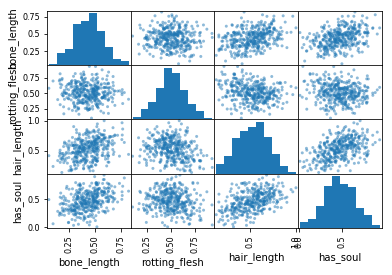

In [25]:
# scatter plot matrix
scatter_matrix(train)
plt.show() # dataset is fairly normalized 

In [26]:
# one hot encoding
train = pd.get_dummies(train, prefix_sep='_', drop_first=True)
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
193,0.248854,0.554872,0.506320,0.089402,0,0,0,1,0
99,0.313506,0.616803,0.396482,0.447946,0,1,0,0,0
47,0.268141,0.665224,0.234944,0.321623,0,0,1,0,0
369,0.294943,0.771286,0.583503,0.300618,0,0,1,0,0
184,0.571502,0.315792,0.765131,0.575139,0,0,1,0,0


In [27]:
 # label encoder for the outputs
from sklearn.preprocessing import LabelEncoder

le_y = LabelEncoder()
le_y = le_y.fit(y)

y = le_y.transform(y)
y

array([0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2,
       1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2,
       1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2,
       1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0,
       2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2,

In [28]:
# adjusted r-squared
# import statsmodels. formula.api
import statsmodels.formula.api as smf
# regression formular
model = smf.ols(formula='y ~  bone_length + rotting_flesh + hair_length + has_soul + color_blood + color_blue + color_clear + color_green + color_white', data=train)
# fit the regression
model_fit = model.fit()
# extract and readjust r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.2962173598095872


In [29]:
# no ensembling techniques
# desicion tree

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=.1, random_state=42)

In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
# performance
trees= accuracy_score(y_test,y_pred)

In [32]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

# performance
y_pred= lr.predict(X_test)
# performance
log =accuracy_score(y_test,y_pred)

In [33]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

# perofrmance
y_pred = knn.predict(X_test)
# performance
knn = accuracy_score(y_test,y_pred)

In [34]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

# perofrmance
y_pred = gnb.predict(X_test)
# performance
bayes = accuracy_score(y_test,y_pred)

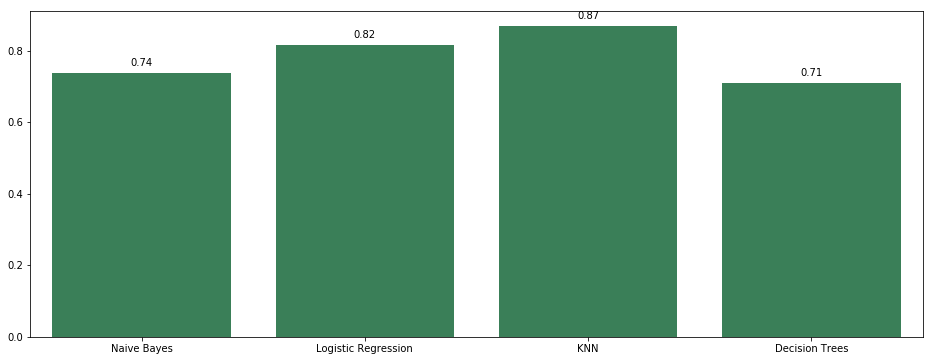

In [35]:
plt.figure(figsize=(16, 6))
s = sns.barplot(x=["Naive Bayes", "Logistic Regression","KNN","Decision Trees"], y=[bayes,knn,log,trees],color="seagreen")
for p in s.patches:
    s.annotate(format(p.get_height(), '.2f'), 
              (p.get_x() + p.get_width() / 2., 

               p.get_height()), ha = 'center', va = 'center', 
              xytext = (0, 10), textcoords = 'offset points')

In [36]:
# ensemble models
# BAGGING
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features='auto',criterion='entropy', class_weight='balanced')

grid = {"n_estimators":[1,200],"max_depth":[1,200]}

clf_cv = GridSearchCV(clf,grid,cv=5)
clf_cv.fit(X_train,y_train)

clf_cv.best_params_



clf = accuracy_score(y_test,y_pred)

In [37]:
# BOOSTING
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=3)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc =accuracy_score(y_test,y_pred)

In [38]:
# stacking
from mlxtend.classifier import StackingClassifier
knn = KNeighborsClassifier(n_neighbors=4)
lr = LogisticRegression()
gnb = GaussianNB()

sclf = StackingClassifier(classifiers=[knn,lr,gnb], meta_classifier=gnb)
sclf.fit(X_train,y_train)
y_pred = sclf.predict(X_test)

sclf = accuracy_score(y_test,y_pred)

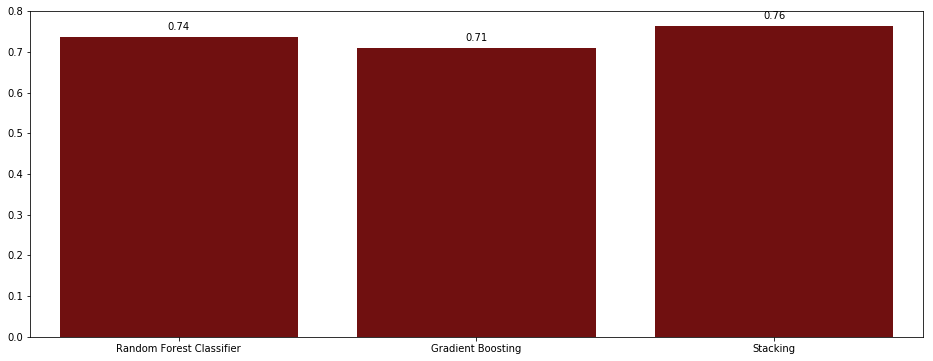

In [39]:
plt.figure(figsize=(16, 6))
s = sns.barplot(x=["Random Forest Classifier","Gradient Boosting","Stacking"], y=[clf,gbc,sclf],color="maroon")
for p in s.patches:
    s.annotate(format(p.get_height(), '.2f'), 
              (p.get_x() + p.get_width() / 2., 

               p.get_height()), ha = 'center', va = 'center', 
              xytext = (0, 10), textcoords = 'offset points')